In [1]:
import pandas as pd

In [132]:
import matplotlib.pyplot as plt
import seaborn as sb

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [3]:
df=pd.read_csv("data/고객db_전처리2.csv",index_col=0)

In [4]:
df.head(2)

,이름,생년월일,현재 나이,연령대,성별,휴대폰 번호,이메일,고객 구분,주소,거주 지역,...,최근 구매 시점,최근 구매 요일,마지막 구매 이후 경과 기간,최근 구매 당시 나이,최근 거래 금액,선호 거래 방식,선호 구매 경로,차량 구매 횟수,신차 구매 지수,브랜드 충성도 지수
연번,,,,,,,,,,,,,,,,,,,,,
1,강주온,2002-03-04,23,20대,남,010-6502-8753,janisi@himedia.co.kr,법인,인천광역시 남동구 구월동 88-10,인천광역시,...,2분기,평일,350,22,35170000,신용카드,오프라인,1,0.002,0.135
2,김경수,1983-01-02,42,40대,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,법인,광주광역시 서구 치평동 14-7,광주광역시,...,1분기,평일,38,42,85790000,신용카드,오프라인,5,0.508,0.037


In [79]:
df[df["최근 구매 당시 나이"]<20]

,이름,생년월일,현재 나이,연령대,성별,휴대폰 번호,이메일,고객 구분,주소,거주 지역,...,최근 구매 시점,최근 구매 요일,마지막 구매 이후 경과 기간,최근 구매 당시 나이,최근 거래 금액,선호 거래 방식,선호 구매 경로,차량 구매 횟수,신차 구매 지수,브랜드 충성도 지수
연번,,,,,,,,,,,,,,,,,,,,,
58,서은정,2005-03-04,20,20대,여,032-170-6440,ugim@daum.net,개인,서울특별시 종로구 청운동 67-89,서울특별시,...,3분기,주말,201,19,57120000,계좌이체,온라인,5,0.052,0.241
71,이정자,2004-03-16,21,20대,여,010-2415-1251,hgim@daum.net,개인,충청남도 천안시 동남구 성성동 22-3,충청남도 천안시,...,3분기,주말,572,19,34130000,계좌이체,온라인,5,0.019,0.388


In [94]:
df["최근 구매 제품"].nunique()

14

In [91]:
df["차량 유형"].nunique()

3

In [93]:
df["차량 사이즈"].nunique()

5

In [ ]:
# (성별/구매 당시 연령별) (차량 사이즈/차량 유형) 분석
# 	→ ex) 여성 20대 30대 40대 의 차량 우선도

In [98]:
category_df=df[["성별","최근 구매 당시 나이","최근 구매 제품","차량 사이즈","차량 유형"]]

In [99]:
# 구매 당시 나이 연령대 구하기
category_df["연령대"] = (df["최근 구매 당시 나이"] // 10 * 10).astype(str) + "대"

/var/folders/6y/dhcn_x315mxfr5mf45wd9ctw0000gp/T/ipykernel_37950/634928100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df["연령대"] = (df["최근 구매 당시 나이"] // 10 * 10).astype(str) + "대"


In [101]:
result=category_df.groupby(["성별","연령대","차량 유형"])[["차량 사이즈"]].count().reset_index()

In [102]:
result=result.rename(columns={"차량 사이즈":"판매량"})

In [103]:
result

,성별,연령대,차량 유형,판매량
0,남,20대,SUV,12
1,남,20대,세단,18
2,남,30대,SUV,12
3,남,30대,세단,13
4,남,30대,해치백,2
5,남,40대,SUV,15
6,남,40대,세단,21
7,남,40대,해치백,3
8,남,50대,SUV,10
9,남,50대,세단,18


In [104]:
result_man=result[result["성별"]=="남"]

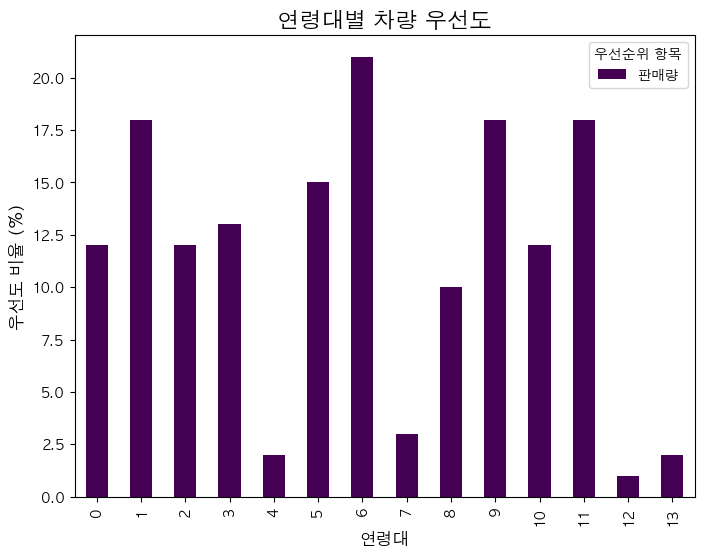

In [105]:
ax = result_man.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')

# 제목과 레이블 설정
ax.set_title('연령대별 차량 우선도', fontsize=16)
ax.set_xlabel('연령대', fontsize=12)
ax.set_ylabel('우선도 비율 (%)', fontsize=12)

plt.legend(title='우선순위 항목')
plt.show()

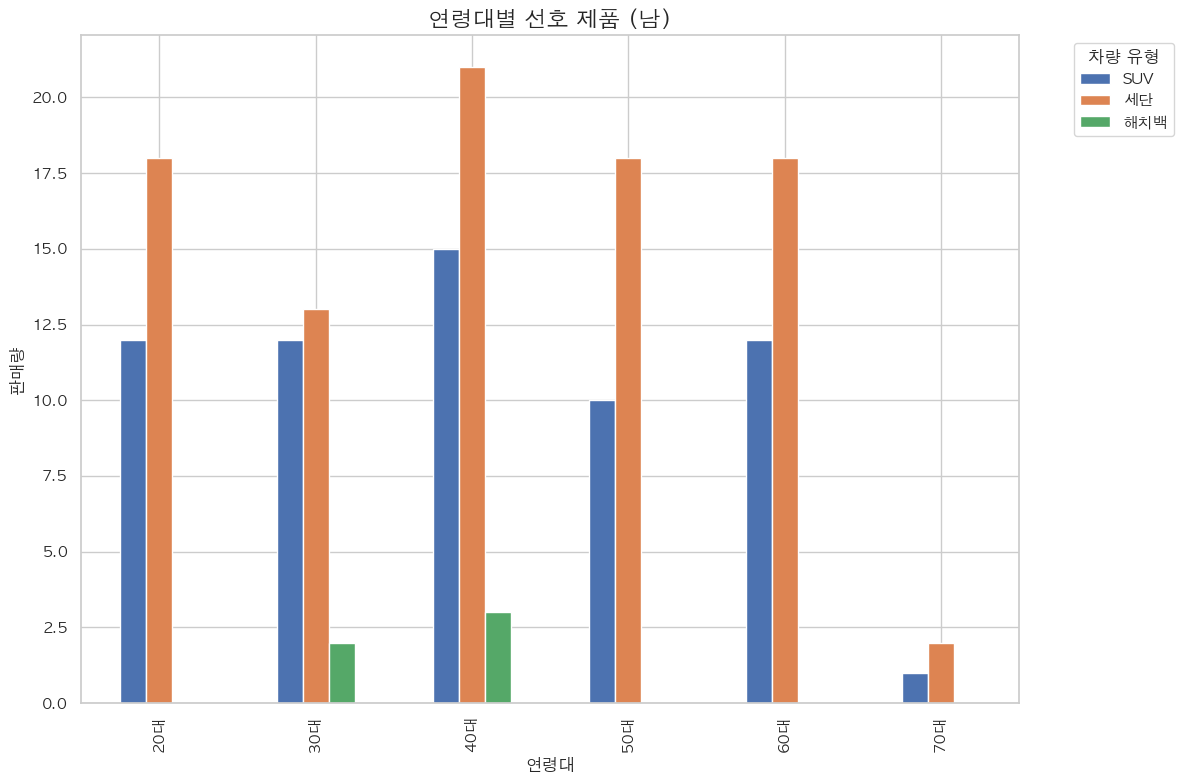

In [ ]:
# 연령대와 제품별 판매량 합산
df_pivot = result_man.pivot_table(index='연령대', columns='차량 유형', values='판매량', aggfunc='sum', fill_value=0)

# 스택형 막대 그래프 그리기
ax = df_pivot.plot(kind='bar', figsize=(12, 8))

# 그래프 제목과 레이블 설정
ax.set_title('연령대별 선호 제품 (남)', fontsize=16)
ax.set_xlabel('연령대', fontsize=12)
ax.set_ylabel('판매량', fontsize=12)

# 범례 설정
plt.legend(title='차량 유형', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 표시
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib

# 한글 폰트 설정 (운영체제에 맞는 폰트를 설정)
matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac 사용자
# matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # Windows 사용자
# matplotlib.rcParams['font.family'] = 'NanumGothic'  # Linux 사용자
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [85]:
result["연령대"].unique()

array(['20대', '30대', '40대', '50대', '60대', '70대', '10대'], dtype=object)

In [139]:
result_Wm=result[result["성별"]=="여"]

In [140]:
result_Wm

,성별,연령대,차량 유형,판매량
14,여,10대,세단,2
15,여,20대,SUV,13
16,여,20대,세단,15
17,여,20대,해치백,2
18,여,30대,SUV,7
19,여,30대,세단,8
20,여,40대,SUV,15
21,여,40대,세단,16
22,여,40대,해치백,1
23,여,50대,SUV,12


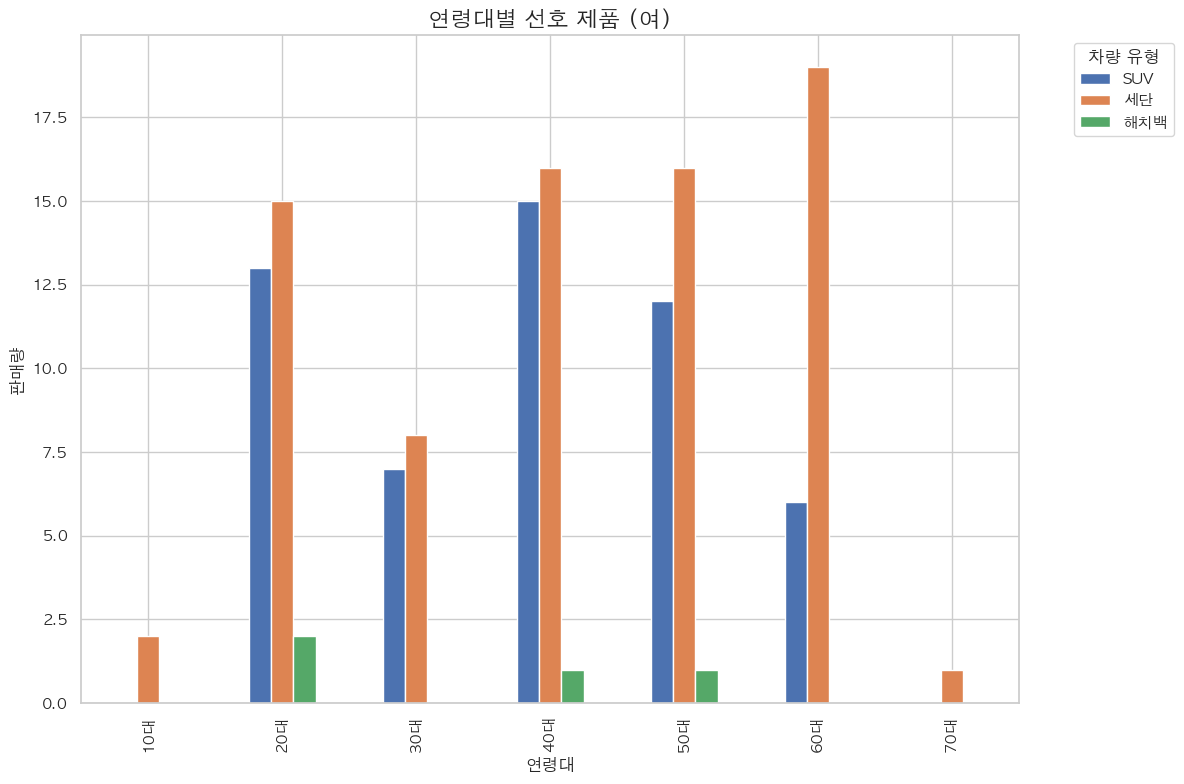

In [143]:
# 연령대와 제품별 판매량 합산
df_pivot = result_Wm.pivot_table(index='연령대', columns='차량 유형', values='판매량', aggfunc='sum', fill_value=0)

# 스택형 막대 그래프 그리기
ax = df_pivot.plot(kind='bar', figsize=(12, 8))

# 그래프 제목과 레이블 설정
ax.set_title('연령대별 선호 제품 (여)', fontsize=16)
ax.set_xlabel('연령대', fontsize=12)
ax.set_ylabel('판매량', fontsize=12)

# 범례 설정
plt.legend(title='차량 유형', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 표시
plt.tight_layout()
plt.show()